In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.optimize as opt
from scipy.optimize import curve_fit
import os
import re


In [45]:
def powerlaw(t,K,n,Af,tau):
    return Af*(1-np.exp(-K*np.power(t+tau,n)/Af))#/Af))


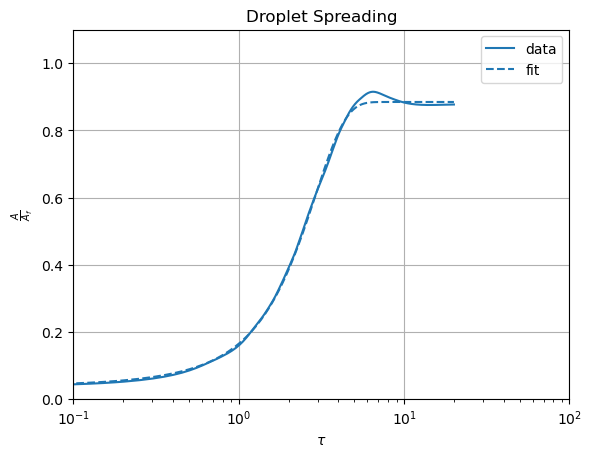

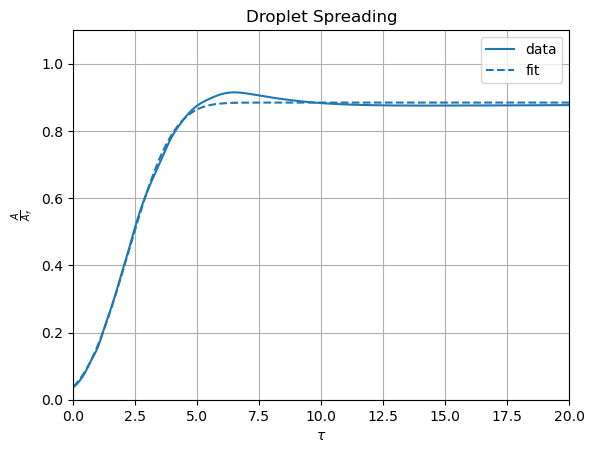

In [64]:
fit_param=np.zeros([1,4])

temp=pd.read_csv('./monitor/dropinfo',header=0,delimiter='\\s+')#,skiprows=1)
data=temp[1:].astype('float32') # Drop first row and interpret data as floating point numbers. 
    # === Plot Data === #
xdata=data['Time'].to_numpy()
ydata=data['WetAreaFract'].to_numpy()

ydata=ydata
p=plt.semilogx(xdata,ydata,label='data')
    # === Fit model === #
    #popt, pcov = curve_fit(powerlaw, data['Time'], np.pi*np.power(data['Wetted'],2),[1,0.5,1,8])
popt, pcov = curve_fit(powerlaw, xdata, ydata,bounds=(10**-3,[10,10,10,2]))
fit_param[0,:]=popt
p=plt.semilogx(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')


plt.ylim([0,1.1])
plt.xlim([1e-1,1e2])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

s=plt.plot(xdata,ydata,label='data')
s=plt.plot(xdata,powerlaw(xdata,popt[0],popt[1],popt[2],popt[3]),'--',color=p[0].get_color(),label='fit')

plt.ylim([0,1.1])
plt.xlim([0,20])
plt.title('Droplet Spreading')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\frac{A}{A_f}$')
plt.legend()
plt.grid()#True,which='Both')
plt.show()

plt.show()
    

In [37]:
#K,n,A_f,tau
fit_param

array([[0.00757385, 4.02777319, 0.92929489, 1.72172173]])

In [65]:
data

,Timestep,Time,VOFmax,VOFmin,Totalvol,Dropheight,WetAreaFract,VoF_WF,CL,CA,CA.1,C,alpha
1,0.0,0.000000,1.0,0.0,4.18847,1.98155,0.037702,0.082676,0.000000,2.55396,146.330994,0.037702,0.000000
2,1.0,0.025244,1.0,0.0,4.19008,1.98155,0.039054,0.083667,0.053578,2.54528,145.834000,0.044361,0.034631
3,2.0,0.050488,1.0,0.0,4.19180,1.98156,0.040623,0.084807,0.062138,2.53516,145.253998,0.051159,0.077228
4,3.0,0.075732,1.0,0.0,4.19354,1.98156,0.042298,0.086017,0.066330,2.52433,144.632996,0.057466,0.118761
5,4.0,0.100976,1.0,0.0,4.19531,1.98157,0.044069,0.087295,0.070168,2.51288,143.977997,0.063713,0.160777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,789.0,19.917500,1.0,0.0,4.26357,1.04759,0.876800,0.811847,0.000228,1.05394,60.386101,0.863313,0.005182
791,790.0,19.942699,1.0,0.0,4.26356,1.04759,0.876806,0.811852,0.000242,1.05393,60.385700,0.862481,0.005504
792,791.0,19.968000,1.0,0.0,4.26355,1.04758,0.876812,0.811856,0.000232,1.05392,60.385300,0.863059,0.005280
793,792.0,19.993200,1.0,0.0,4.26354,1.04757,0.876818,0.811861,0.000221,1.05391,60.384899,0.863698,0.005033


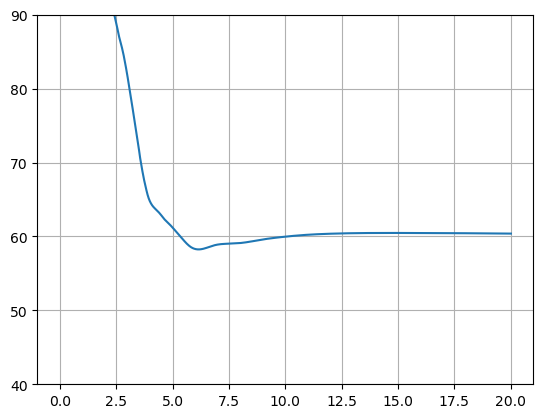

In [66]:
s=plt.plot(xdata,data['CA.1'].to_numpy(),label='data')
plt.ylim([40,90])
plt.grid()